In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices_0 = pd.read_csv("prices_round_3_day_0.csv", delimiter=';')
prices_1 = pd.read_csv("prices_round_3_day_1.csv", delimiter=';')
prices_2 = pd.read_csv("prices_round_3_day_2.csv", delimiter=';')

trades_0 = pd.read_csv("trades_round_3_day_0_nn.csv", delimiter=';')
trades_1 = pd.read_csv("trades_round_3_day_1_nn.csv", delimiter=';')
trades_2 = pd.read_csv("trades_round_3_day_2_nn.csv", delimiter=';')

In [41]:
def create_product_dataframes(df):
    chocolate = df[df['product'] == 'CHOCOLATE']
    chocolate['index'] = range(0, len(chocolate))

    strawberries = df[df['product'] == 'STRAWBERRIES']
    strawberries['index'] = range(0, len(strawberries))

    roses = df[df['product'] == 'ROSES']
    roses['index'] = range(0, len(roses))

    gift_basket = df[df['product'] == 'GIFT_BASKET']
    gift_basket['index'] = range(0, len(gift_basket))

    return chocolate, strawberries, roses, gift_basket

def add_mid_prices_to_gift_basket(chocolate, strawberries, roses, gift_basket):
    gift_basket['choc bid'] = gift_basket.apply(lambda x: chocolate.iloc[x['index']]['mid_price'], axis=1)
    gift_basket['straw bid'] = gift_basket.apply(lambda x: strawberries.iloc[x['index']]['mid_price'], axis=1)
    gift_basket['roses bid'] = gift_basket.apply(lambda x: roses.iloc[x['index']]['mid_price'], axis=1)

    return gift_basket

In [ ]:
df = prices_0
choc, straw, rose, gift = create_product_dataframes(df)

time = gift['timestamp']
c = choc['mid_price']
s = straw['mid_price']
r = rose['mid_price']
g = gift['mid_price']

plt.figure()


In [35]:
last_time1 = prices_0['timestamp'].iloc[-1]
print(last_time1)
prices_1['timestamp'] += last_time1 + 100

last_time2 = prices_1['timestamp'].iloc[-1]
print(last_time2)
prices_2['timestamp'] += last_time2 + 100

df = pd.concat([prices_0, prices_1, prices_2], ignore_index=True)

999900
2999900


In [30]:
df = 

In [37]:
chocolate, strawberries, roses, gift_basket = create_product_dataframes(df)
new_df = add_mid_prices_to_gift_basket(chocolate, strawberries, roses, gift_basket)

C:\Users\chris\AppData\Local\Temp\ipykernel_29532\2457575962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate['index'] = range(0, len(chocolate))
C:\Users\chris\AppData\Local\Temp\ipykernel_29532\2457575962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strawberries['index'] = range(0, len(strawberries))
C:\Users\chris\AppData\Local\Temp\ipykernel_29532\2457575962.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [38]:
new_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,index,choc bid,straw bid,roses bid
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,...,71363.0,24.0,NaN,NaN,71355.0,0.0,0,8000.0,4000.0,15000.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,...,71356.0,12.0,71357.0,20.0,71349.5,0.0,1,8001.5,3999.5,15000.0
9,0,200,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,...,71351.0,14.0,71352.0,21.0,71347.0,0.0,2,8001.0,3999.5,15000.5
14,0,300,GIFT_BASKET,71345,2,71343.0,11.0,71342.0,29.0,71356,...,71357.0,11.0,71358.0,29.0,71350.5,0.0,3,8002.5,3999.5,15000.0
19,0,400,GIFT_BASKET,71336,2,71335.0,13.0,71334.0,25.0,71347,...,71348.0,13.0,71349.0,25.0,71341.5,0.0,4,8002.0,3999.5,14997.5


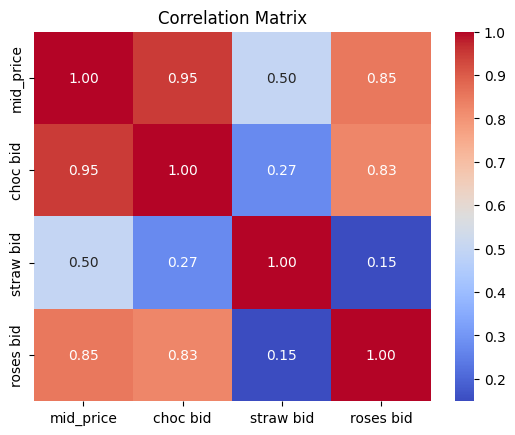

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# You might need to correct the column names if there are any typos or spaces
features = ['mid_price', 'choc bid', 'straw bid', 'roses bid']

# Compute the correlation matrix for the selected features
corr = new_df[features].corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [40]:
prices = new_df[['mid_price', 'choc bid', 'straw bid', 'roses bid']]
prices['premium'] = prices.apply(lambda x: x['mid_price'] - x['choc bid'] * 4 - x['straw bid'] * 6 - x['roses bid'] - 375, axis=1)
# prices['% premium'] = prices['bid abs premium'] / prices['ask_price_1'] * 100

C:\Users\chris\AppData\Local\Temp\ipykernel_29532\4167624016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['premium'] = prices.apply(lambda x: x['mid_price'] - x['choc bid'] * 4 - x['straw bid'] * 6 - x['roses bid'] - 375, axis=1)


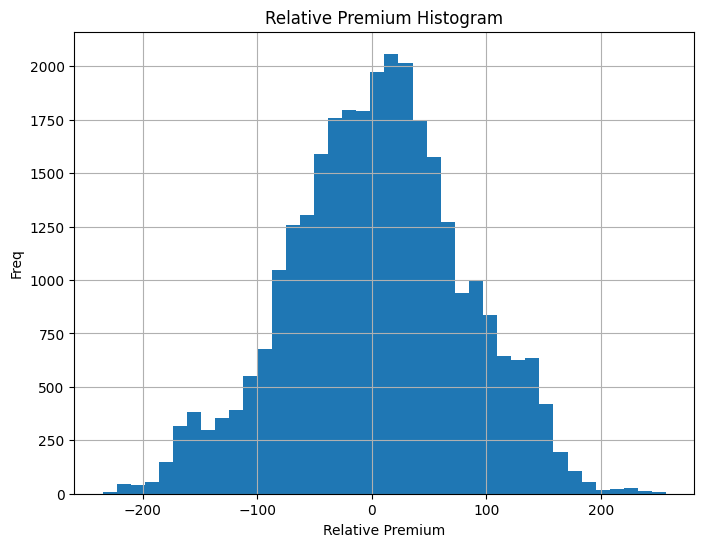

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 6))


plt.title("Relative Premium Histogram")
plt.ylabel("Freq")
plt.xlabel("Relative Premium")
prices['premium'].hist(bins=40)

# Create more ticks on the x-axis
ax = plt.gca()  # Get the current axis
plt.show()

In [35]:
b = 20

In [36]:
import numpy as np
import math

# Assuming prices['premium'] is your data
data = prices['premium']

# Calculate histogram
counts, bin_edges = np.histogram(data, bins=b)
total = 30000

print("Counts in each bin:", counts)
print("Bin edges:", bin_edges)


Counts in each bin: [  56   94  466  683  747 1229 2305 2894 3556 3765 4073 3324 2212 1835
 1270 1056  299   70   47   19]
Bin edges: [-235.  -210.4 -185.8 -161.2 -136.6 -112.   -87.4  -62.8  -38.2  -13.6
   11.    35.6   60.2   84.8  109.4  134.   158.6  183.2  207.8  232.4
  257. ]


In [37]:
factor = 0
if len(bin_edges) % 2:
    factor = 1

new = bin_edges[1:len(bin_edges)//2+factor]
buy_buckets = []
for b in new:
    if b < 1:
        buy_buckets.append(b) 


sell_buckets = bin_edges[len(bin_edges)//2+factor:]
print('Buys:\n', buy_buckets)
print('Sells:\n', sell_buckets)

Buys:
 [-210.4, -185.8, -161.2, -136.6, -112.0, -87.39999999999998, -62.79999999999998, -38.19999999999999, -13.599999999999994]
Sells:
 [ 35.6  60.2  84.8 109.4 134.  158.6 183.2 207.8 232.4 257. ]


In [31]:
sell_level = sell_buckets[0]
buy_level = buy_buckets[-1]

sell_level, buy_level

(52.0, -30.0)

In [32]:
probability_at_level_buy = []
profit_at_level_buy = []
sum = 0
print("Buys:")
for i, level in enumerate(buy_buckets):
    sum += counts[i]/total
    probability_at_level_buy.append(sum)
    
    profit = sell_level - level
    profit_at_level_buy.append(profit)

    print(f"Profit per sell is {profit:2f} seashells")
    print(f"Cumulative Percentage of Total: {sum*100:.2f}%")

sum = 0
probability_at_level_sell = []
profit_at_level_sell = []

print("\nSells:")
for i, level in reversed(list(enumerate(sell_buckets))):
    index = i + len(buy_buckets)
    sum += counts[index] / total
    probability_at_level_sell.append(sum)

    profit = level - buy_level
    profit_at_level_sell.append(profit)


probability_at_level_sell = list(reversed(probability_at_level_sell))
profit_at_level_sell = list(reversed(profit_at_level_sell))

for prob, profit in zip(probability_at_level_sell, profit_at_level_sell):
    print(f"Profit per buy is {profit:.2f} seashells")
    print(f"Cumulative Percentage of Total: {prob*100:.2f}%")


Buys:
Profit per sell is 246.000000 seashells
Cumulative Percentage of Total: 0.36%
Profit per sell is 205.000000 seashells
Cumulative Percentage of Total: 2.89%
Profit per sell is 164.000000 seashells
Cumulative Percentage of Total: 6.82%
Profit per sell is 123.000000 seashells
Cumulative Percentage of Total: 15.62%
Profit per sell is 82.000000 seashells
Cumulative Percentage of Total: 31.95%

Sells:
Profit per buy is 82.00 seashells
Cumulative Percentage of Total: 67.87%
Profit per buy is 123.00 seashells
Cumulative Percentage of Total: 47.17%
Profit per buy is 164.00 seashells
Cumulative Percentage of Total: 26.12%
Profit per buy is 205.00 seashells
Cumulative Percentage of Total: 13.04%
Profit per buy is 246.00 seashells
Cumulative Percentage of Total: 4.79%
Profit per buy is 287.00 seashells
Cumulative Percentage of Total: 0.51%


In [717]:
def find_optimal_combination(probabilities, profits, max_total):
    n = len(probabilities)
    
    def helper(start, current_total, current_profit):
        if start == n:
            return current_profit, [0] * n
        
        best_profit = current_profit
        best_combination = [0] * n
        
        for i in range(max_total - current_total + 1):
            profit = current_profit + probabilities[start] * profits[start] * i
            combination = [0] * n
            combination[start] = i
            
            sub_profit, sub_combination = helper(start + 1, current_total + i, profit)
            
            if sub_profit > best_profit:
                best_profit = sub_profit
                best_combination = sub_combination
                best_combination[start] = i
        
        return best_profit, best_combination
    
    return helper(0, 0, 0)

In [718]:
percent, profit = probability_at_level_buy[-3:], profit_at_level_buy[-3:]
print('probs', percent[-3:])
print('profits', profit[-3:])
print('buckets', buy_buckets[-3:])

buy_profit, combos = find_optimal_combination(percent[-4:], profit[-4:], 60)
buy_profit, combos

probs [0.016933333333333335, 0.040633333333333334, 0.09586666666666667]
profits [154.2, 115.64999999999999, 77.1]
buckets [-112.9, -74.35000000000001, -35.80000000000001]


(443.4792, [0, 0, 60])

In [719]:
sell_prob, sell_profit = probability_at_level_sell[:3], profit_at_level_sell[:3]
print('probs', sell_prob[:3])
print('profits', sell_profit[:3])
print('buckets', sell_buckets[:3])

sell_profit, combos = find_optimal_combination(sell_prob, profit, 60)
sell_profit, combos

probs [0.2315, 0.17003333333333334, 0.10963333333333333]
profits [77.1, 115.64999999999998, 154.2]
buckets [ 41.3   79.85 118.4 ]


(2141.8379999999997, [60, 0, 0])

buy combo: 10, 60

sell combo: 41, 60

-> 337k